In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [26]:
digits = load_digits()	

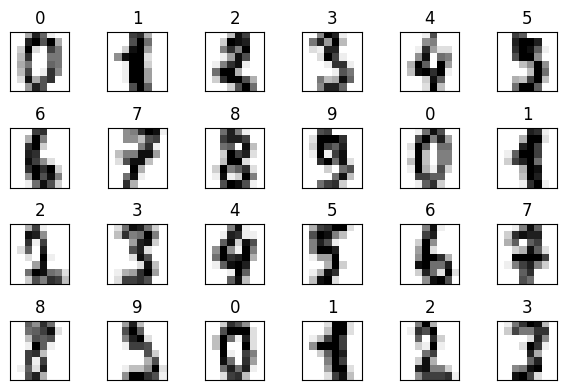

In [27]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

plt.tight_layout()
plt.show()


In [28]:

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.15)

print(X_train.shape)
print(X_test.shape)


(1527, 64)
(270, 64)


In [29]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [30]:
predicted = knn.predict(X=X_test)
expected = y_test

In [31]:
print('Перші 20')
print(predicted[:20])
print(expected[:20])

print('Перші 24')
print(predicted[:24])
print(expected[:24])

print('Перші 36')
print(predicted[:36])
print(expected[:36])


Перші 20
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]
Перші 24
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6 9 6 0 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6 9 6 0 6]
Перші 36
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6 9 6 0 6 9 3 2 1 8 1 7 0 4 4 1 5]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6 9 6 0 6 9 3 2 1 8 1 7 0 4 4 1 5]


In [32]:
print('Tочність моделі:', knn.score(X_test, y_test))

Tочність моделі: 0.9814814814814815


In [33]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)


[[29  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  1  0  1  0  0]
 [ 0  0  0  0 30  0  0  1  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0  0  0 21  0]
 [ 0  0  0  0  1  0  0  0  1 25]]


In [34]:
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        30
           3       1.00      0.94      0.97        32
           4       0.97      0.97      0.97        31
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        26
           7       0.92      1.00      0.96        23
           8       0.95      1.00      0.98        21
           9       1.00      0.93      0.96        27

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



In [35]:
svm = SVC()
svm.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print(f'KNeighborsClassifier:\n Точність тренувального: {knn.score(X_train, y_train)}\n Точність тестового: {knn.score(X_test, y_test)}')
print(f'SVM:\n Точність тренувального: {svm.score(X_train, y_train)}\n Точність тестового: {svm.score(X_test, y_test)}')
print(f'GaussianNB:\n Точність тренувального: {gnb.score(X_train, y_train)}\n Точність тестового: {gnb.score(X_test, y_test)}')


KNeighborsClassifier:
 Точність тренувального: 0.9895219384413884
 Точність тестового: 0.9814814814814815
SVM:
 Точність тренувального: 0.9967256057629339
 Точність тестового: 0.9851851851851852
GaussianNB:
 Точність тренувального: 0.8781925343811395
 Точність тестового: 0.8333333333333334


In [36]:
def evaluate_knn(X_train, y_train, X_test, y_test, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    return accuracy


n_neighbors = 2
step = 1

for i in range(10):
    accuracy = evaluate_knn(X_train, y_train, X_test, y_test, n_neighbors)
    print(f"Точність з {n_neighbors} сусідами: {accuracy}")
    n_neighbors += step


Точність з 2 сусідами: 0.9925925925925926
Точність з 3 сусідами: 0.9888888888888889
Точність з 4 сусідами: 0.9851851851851852
Точність з 5 сусідами: 0.9814814814814815
Точність з 6 сусідами: 0.9777777777777777
Точність з 7 сусідами: 0.9777777777777777
Точність з 8 сусідами: 0.9777777777777777
Точність з 9 сусідами: 0.9777777777777777
Точність з 10 сусідами: 0.9777777777777777
Точність з 11 сусідами: 0.9777777777777777
